In [1]:
import pandas as pd
import tensorflow as tf
from keras import datasets, layers, models
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

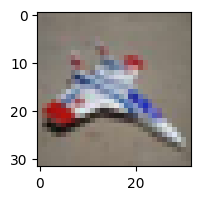

In [5]:
plt.figure(figsize=(4,2))
plt.imshow(X_train[30])

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [8]:
y_train, y_test = y_train.reshape(-1,), y_test.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
y_train[100]        # gives value between 1 to 9 as we have 9 different classifications

8

In [12]:

def view(i, x=X_train, y=y_train):
    plt.figure(figsize=(1,1))
    plt.imshow(x[i])
    plt.xlabel(label[y[i]])

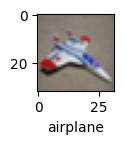

In [13]:
view(30)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0].shape

(32, 32, 3)

# CNN :

In [16]:
# if sigmoid is used, it'll give values like this :
# 1. 0.34
# 2. 0.78
# sum of 1. & 2. can be 1

# But, in softmax, we get :
# 1. 0.34 / (0.78 + 0.34)
# 2. 0.78 / (0.78 + 0.34)
# sum of 1. & 2. always 1

In [17]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(  #optimizer='SGD',                       SGD : Stochastic gradient descent
            optimizer='adam',
            loss='sparse_categorical_crossentropy',   # difference between categorical and sparse categorical is it can have values other tha 0 1, too.
            metrics=['accuracy']
        )
    
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 19ms/step - loss: 1.5401 - accuracy: 0.4407
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2087 - accuracy: 0.5733
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0777 - accuracy: 0.6228
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9928 - accuracy: 0.6536
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9320 - accuracy: 0.6735
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8800 - accuracy: 0.6927
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8381 - accuracy: 0.7076
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8041 - accuracy: 0.7191
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7710 - accuracy: 0.7308
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9167 - accuracy: 0.6892


[0.9166879057884216, 0.6891999840736389]

In [19]:
y_test = y_test.reshape(-1,)

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

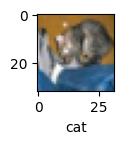

In [21]:
view(0,X_test, y_test)

In [22]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.33886654e-02, 4.30573185e-04, 3.36225107e-02, 5.61569571e-01,
        1.00385742e-02, 4.07262743e-02, 9.03351307e-02, 6.86391606e-04,
        2.49060929e-01, 1.41425422e-04],
       [7.37910643e-02, 1.95079178e-01, 2.21671798e-05, 3.54964823e-06,
        1.41018427e-06, 3.71041693e-07, 9.73441502e-07, 1.74433609e-07,
        6.88109159e-01, 4.29919772e-02],
       [1.07681066e-01, 2.47899015e-02, 1.18909124e-03, 4.72997129e-03,
        2.19878391e-03, 1.06981746e-03, 4.44105564e-04, 1.90586923e-03,
        8.40321779e-01, 1.56696234e-02],
       [8.19252193e-01, 4.42803692e-04, 5.00170188e-03, 1.65725171e-04,
        1.00971700e-03, 1.03539414e-05, 2.97310544e-05, 1.01167370e-05,
        1.73902705e-01, 1.74907342e-04],
       [8.53851907e-06, 1.95446322e-04, 6.99527096e-03, 2.08387319e-02,
        2.23228168e-02, 4.93912667e-04, 9.48426783e-01, 2.18586365e-06,
        7.15852715e-04, 5.51836536e-07]], dtype=float32)

In [23]:
val= [np.argmax(i) for i in y_pred]
val[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

(None, None)

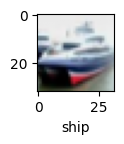

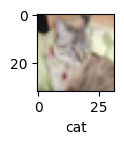

In [25]:
view(1,X_test, y_test), view(8,X_test, y_test)

In [26]:
print("classification_report :\n" , classification_report(y_test, val))

classification_report :
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.82      0.82      0.82      1000
           2       0.55      0.61      0.58      1000
           3       0.54      0.51      0.53      1000
           4       0.64      0.57      0.61      1000
           5       0.65      0.54      0.59      1000
           6       0.68      0.83      0.74      1000
           7       0.72      0.74      0.73      1000
           8       0.75      0.84      0.79      1000
           9       0.81      0.74      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [29]:
cf_matrix = confusion_matrix(y_test, val)
cf_matrix

array([[700,  19,  65,  22,  34,   4,  15,   9,  98,  34],
       [ 26, 816,  11,  11,   2,   3,  14,   5,  44,  68],
       [ 63,   4, 611,  55,  67,  50,  83,  42,  17,   8],
       [ 20,  14,  82, 508,  73, 134,  84,  46,  23,  16],
       [ 21,   5, 123,  54, 571,  18, 102,  90,  14,   2],
       [ 15,   4,  81, 178,  43, 540,  48,  66,  18,   7],
       [  5,   4,  60,  48,  23,  15, 826,   4,  13,   2],
       [ 18,   6,  52,  30,  59,  55,  17, 738,   9,  16],
       [ 55,  23,  12,  13,   9,   9,  12,   7, 838,  22],
       [ 39,  95,   9,  16,   5,   8,  18,  19,  47, 744]], dtype=int64)

<AxesSubplot: >

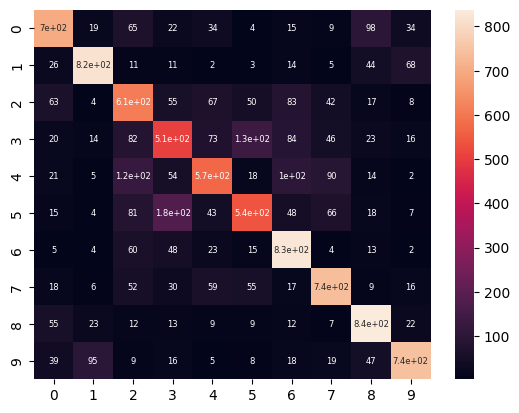

In [39]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, annot_kws={'size':6})